In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Install torch**

In [2]:
!pip3 install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:46tcmalloc: large alloc 1147494400 bytes == 0x55a7b7f70000 @  0x7ff546383615 0x55a77f1e23bc 0x55a77f2c318a 0x55a77f1e51cd 0x55a77f2d7b3d 0x55a77f259458 0x55a77f25402f 0x55a77f1e6aba 0x55a77f2592c0 0x55a77f25402f 0x55a77f1e6aba 0x55a77f255cd4 0x55a77f2d8986 0x55a77f255350 0x55a77f2d8986 0x55a77f255350 0x55a77f2d8986 0x55a77f255350 0x55a77f1e6f19 0x55a77f22aa79 0x55a77f1e5b32 0x55a77f2591dd 0x55a77f25402f 0x55a77f1e6aba 0x55a77f255cd4 0x55a77f25402f 0x55a77f1e6aba 0x55a77f254eae 0x55a77f1e69da 0x55a77f255108 0x55a77f25402f
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:52tcmalloc: large alloc 1434370048 bytes == 0x55a7fc5c6000 @  0x7ff546383615 0x55a77f1e23bc 0x55a77f2c318a 0x55a77f1e51cd 0x55a77f2d7b3d 0x55a77f259458 0x55a77f25402f 0x55a77f1e6aba 0x55a77f2592c0 0x55a77f25402f 0x55a77f1e6aba 0x55a77f255cd4 0x55a77f2d8986 0x55a77

# **2. Donwload YoLoV5**

In [3]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
!git clone https://github.com/ultralytics/yolov5  # clone

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5


# **3. Install library**

In [5]:
%cd yolov5
!pip install -r requirements.txt  # install

/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5
     |████████████████████████████████| 596 kB 17.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import os

# 4. Load model yolov5 on github

In [ ]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom


In [ ]:
model

# Test with 1 image on internet

image 1/1: 338x507 25 cars
Speed: 307.8ms pre-process, 30.4ms inference, 8.1ms NMS per image at shape (1, 3, 448, 640)


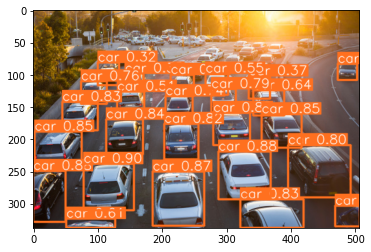

In [ ]:
# Images
img = 'https://media.istockphoto.com/photos/aerial-view-of-cars-in-traffic-picture-id159406920?k=20&m=159406920&s=170667a&w=0&h=DBBrPv4hXOi12yMki0WgMfTXLPJDJl7GH_8q9FtCJyg='  # or file, Path, PIL, OpenCV, numpy, list
results = model(img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()
# plt.imshow(np.squeeze(results.render()))

# 5. Data processing
convert file json and xml -> file txt

In [ ]:
!ls
%pylab inline

import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import json

with open('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/annotations/ninedash_keypoints_train.json') as json_data:

  dataJson = json.load(json_data)

CONTRIBUTING.md  export.py   __pycache__       setup.cfg       val.py
data		 hubconf.py  README.md	       train.py        yolov5
detect.py	 LICENSE     requirements.txt  tutorial.ipynb  yolov5m.pt
Dockerfile	 models      runs	       utils	       yolov5s.pt
Populating the interactive namespace from numpy and matplotlib


In [ ]:
#step 2: convert to yolov5 save it to the into desk
__class_name_to_id_napping = {"dash":0}
for i in dataJson['images']:
  print_buffer = []
  imgID = i['id']
  image_w = i['width']
  image_h = i['height']
  imgName = i['file_name']

  for annotation in dataJson['annotations']:
    if imgID == annotation['image_id']:
      class_id = 'dash'
      class_id = __class_name_to_id_napping[class_id]
      # transfrom bounding box into yolov5 format
      imgBbox = annotation['bbox']

      bbox_x_center = (imgBbox[0] + imgBbox[2] + imgBbox[0]) /2 
      bbox_y_center = (imgBbox[1] + imgBbox[3] + imgBbox[1]) /2 
      bbox_width = imgBbox[2]
      bbox_height = imgBbox[3]
      print(imgBbox)
      # normalize the coordinates along the width and height of the image
      bbox_x_center /= image_w
      bbox_y_center /= image_h
      bbox_width /= image_w
      bbox_height /= image_h

      print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height))
      i = os.path.join(f"/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train", imgName.replace('jpg','txt'))
      print('\n'.join(print_buffer), file=open(i, 'w'))
      print("save succsesfull")

In [ ]:
__class_name_to_id_napping = {"dash":0}
#step 1: extract xml info
def extract_inf(xml_file):
  root = ET.parse(xml_file).getroot()
  info_dict = {}
  info_dict['bboxes'] = []

  for elem in root:
    if elem.tag == "filename":
      info_dict['filename'] = elem.text
    elif elem.tag == "size":
      img_size = [int (subelem.text) for subelem in elem]
      info_dict['image_size'] = tuple(img_size)
    elif elem.tag == 'object':
      bbox = {}
      for subelem in elem:
        if subelem.tag == 'name':
          bbox["class"] = subelem.text
        elif subelem.tag == 'bndbox':
          for subsubelem in subelem:
            bbox[subsubelem.tag] = int(subsubelem.text)
      info_dict['bboxes'].append(bbox)
  return info_dict

#step 2: convert to yolov5 save it to the into desk
def convert_to_yolov5(info_dict):

  print_buffer = []

  for bbox in info_dict['bboxes']:
    try:
      class_id = __class_name_to_id_napping[bbox['class']]
    except KeyError:
      print("Invalid class. must be one from", __class_name_to_id_napping.key())
    # transfrom bounding box into yolov5 format
    bbox_x_center = (bbox['xmin'] + bbox['xmax']) /2 
    bbox_y_center = (bbox['ymin'] + bbox['ymax']) /2
    bbox_width = (bbox['xmax'] - bbox['xmin'])
    bbox_height = (bbox['ymax'] - bbox['ymin'])

    # normalize the coordinates along the width and height of the image
    image_w , image_h, _ = info_dict['image_size']
    bbox_x_center /= image_w
    bbox_y_center /= image_h
    bbox_width /= image_w
    bbox_height /= image_h

    print_buffer.append("{} {:.20f} {:.20f} {:.20f} {:.20f}".format(class_id, bbox_x_center, bbox_y_center, bbox_width, bbox_height))
  save_file_names = os.path.join(f"/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/val", info_dict['filename'].replace('jpg','txt'))
  print('\n'.join(print_buffer), file=open(save_file_names, 'w'))
  print("save succsesfull")


In [ ]:
import os
from glob import glob
import xml.etree.ElementTree as ET
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data
val = glob('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/annotated_val/*.xml')
for file in val:
  info_dict = extract_inf(file)
  print(info_dict)
  convert_to_yolov5(info_dict)

In [ ]:
from IPython.core.display import Image
import cv2
import os
import random
import shutil 
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from tqdm import tqdm
import numpy as np
from google.colab.patches import cv2_imshow
def draw_bounding_box(image, annotation_text_file):
  with open(annotation_text_file, 'r') as file:
    annotation = file.read().split('\n')[:-1]
    annotation = [ x.split(" ") for x in annotation]
    annotation = [ list(map(float,x)) for x in annotation]

    
  annotations = np.array(annotation) #has a from [[class_id, x_center, y_center, bbox_width, bbox_height]]

  print(f"annotation value before de-normalizaiton: {annotations}")
  h , w, _ = image.shape
  print("width:",h)
  print("height:",w)
  # de-normalize annotations
  annotations_cp = np.copy(annotations)
  annotations_cp[:, [1,3]] = annotations[:, [1,3]] * w # x_center, bbox_width
  annotations_cp[:, [2,4]] = annotations[:, [2,4]] * h # y_center, bbox_height
  print(f"annotation value after de-normolization: {annotations_cp}")

  #convert to (xmin, xmax, ymin, ymax) to draw cv2.rectangle
  annotations_cp[ :,1] = (annotations_cp[ :,1] - annotations_cp[ :,3]/2)
  annotations_cp[ :,2] = (annotations_cp[ :,2] - annotations_cp[ :,4]/2)
  annotations_cp[ :,3] = (annotations_cp[ :,1] + annotations_cp[ :,3])
  annotations_cp[ :,4] = (annotations_cp[ :,2] + annotations_cp[ :,4])

  for single_annotation in annotations_cp:
    obj_cls, x0, y0, x1, y1 = single_annotation
    start_point = (int(x0), int(y0))
    end_point = (int(x1), int(y1))
    color=(255,0,0)
    thickness=2
    cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
annotation value before de-normalizaiton: [[0.    0.598 0.529 0.448 0.76 ]]
width: 350
height: 466
annotation value after de-normolization: [[  0.    278.668 185.15  208.768 266.   ]]


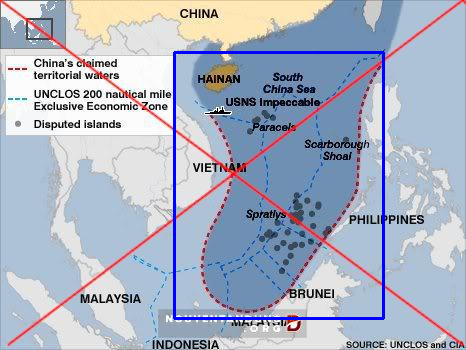

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
image_file = "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images/train/001.jpg"
annotation_file = "/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/labels/train/001.txt"
img = cv2.imread(image_file)
draw_bounding_box(img, annotation_file)

# Train model

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
%cd yolov5 
!pwd

/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5
/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5
/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5


In [ ]:
!python train.py --img 320 --batch 10 --epochs 100 --data dataset.yaml --weights yolov5s.pt  --cache

# Test with each image (test_dataset)

In [16]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5
!python detect.py --weights runs/train/exp18/weights/best.pt --img 320 --source ../test/013.jpg


/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5
detect: weights=['runs/train/exp18/weights/best.pt'], source=../test/013.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/test/013.jpg: 320x320 1 dash, Done. (0.012s)
Speed: 0.3ms pre-process, 12.3ms inference, 1.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/dete

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/train/exp18/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-21 torch 1.8.2+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


/content/drive/.shortcut-targets-by-id/1sNb57uh5bK73mVEZMV7wv1YwhYllWF2t/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/detect/exp24


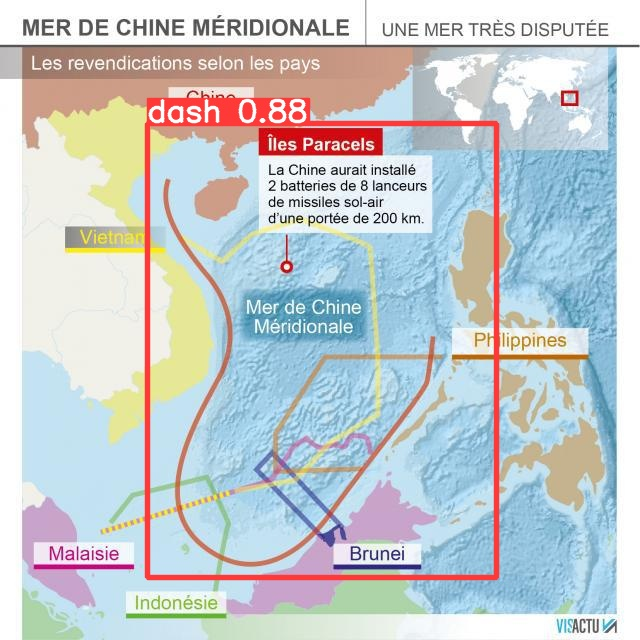

In [36]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/detect/exp24
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = '013.jpg'
img = cv2.imread(image)
cv2_imshow(img)

In [ ]:
# import torch
# import os
# img = os.path.join('/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/data/images', 'train', '007.jpg')
# results = model(img)
# results.print()
# %matplotlib inline
# plt.imshow(np.squeeze(results.render()))
# plt.show()
# plt.imshow(np.squeeze(results.render()))

# Test all test_dataset 

In [ ]:
%cd /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/

/content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5


In [ ]:
!python detect.py --weights runs/train/exp18/weights/best.pt --img 640 --source ../test

# Lưu mô hình cho những lần sử dụng sau

In [ ]:
%cp /content/drive/MyDrive/PhatHienDuongLuoiBo/YoloV5/yolov5/runs/train/exp18/weights/best.pt /content/drive/MyDrive/PhatHienDuongLuoiBo/

Train/exp18
Detect/exp18
với 100 epoch 
mAP 0.5 : 0.95 = 0.57 